In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [16]:
df = pd.read_csv("../data/processed_data/vancouver_real_estate.csv")

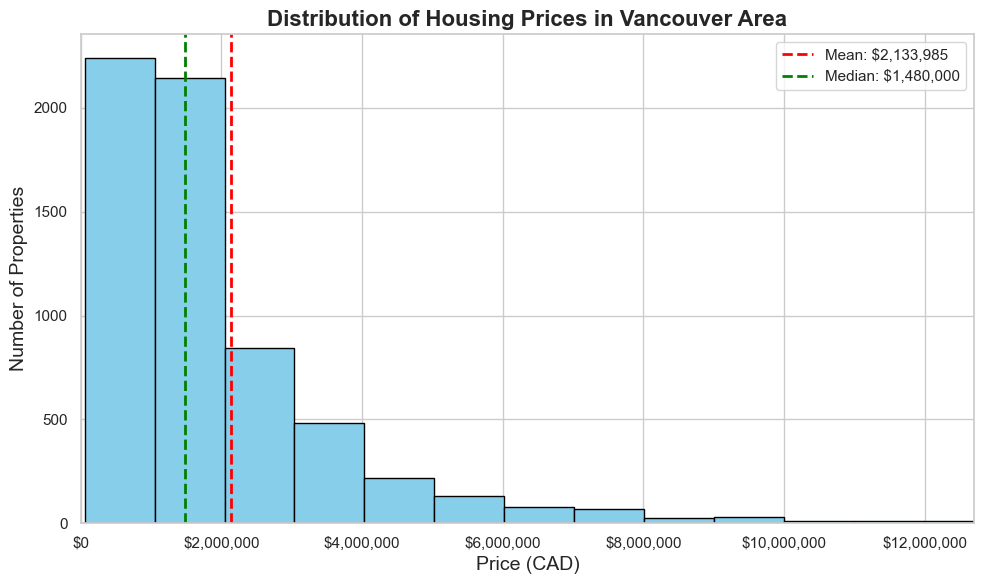

In [17]:
# Set seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Drop NA and define price data
price_data = df["price"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(price_data, bins=50, color='skyblue', edgecolor='black')

# Titles and labels
plt.title("Distribution of Housing Prices in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Price (CAD)", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Format x-axis with thousands separator
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${int(x):,}'))

# Add vertical lines for key statistics
mean_price = price_data.mean()
median_price = price_data.median()

plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:,.0f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')

# Show legend
plt.legend()

# Optional: Adjust x-limits if there's a long tail
plt.xlim(0, price_data.quantile(0.99))  # Focus on the bulk of distribution

plt.tight_layout()
plt.show()


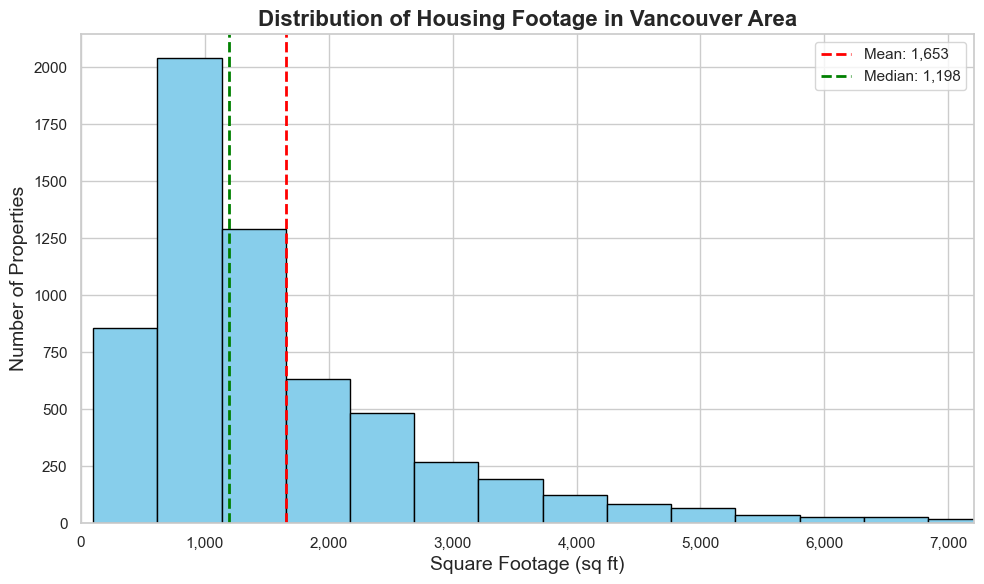

In [18]:
# Set seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Drop NA and define price data
footage_data = df["square_footage"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(footage_data, bins=50, color='skyblue', edgecolor='black')

# Titles and labels
plt.title("Distribution of Housing Footage in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Square Footage (sq ft)", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Format x-axis with thousands separator
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Add vertical lines for key statistics
mean_footage = footage_data.mean()
median_footage = footage_data.median()

plt.axvline(mean_footage, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_footage:,.0f}')
plt.axvline(median_footage, color='green', linestyle='--', linewidth=2, label=f'Median: {median_footage:,.0f}')

# Show legend
plt.legend()

# Optional: Adjust x-limits if there's a long tail
plt.xlim(0, footage_data.quantile(0.99))  # Focus on the bulk of distribution

plt.tight_layout()
plt.show()


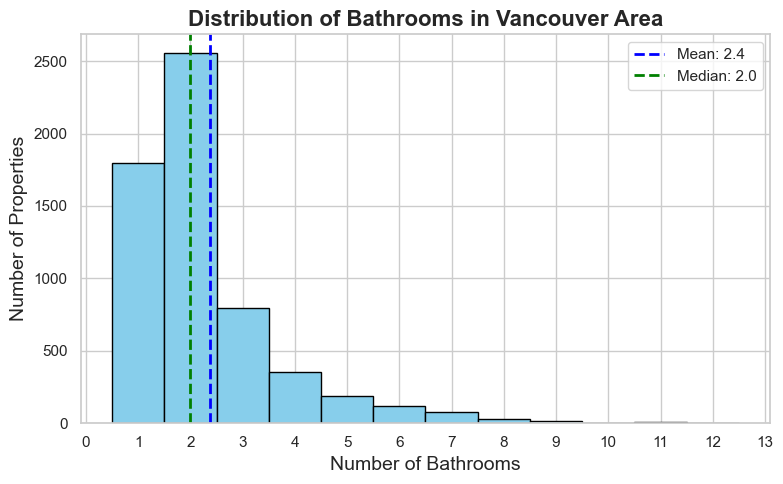

In [19]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plot histogram for number of bathrooms
bath_data = df["bathroom"].dropna()
plt.hist(bath_data, bins=range(1, int(bath_data.max()) + 2), color='skyblue', edgecolor='black', align='left')

# Titles and labels
plt.title("Distribution of Bathrooms in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Add vertical lines for mean and median
mean_bath = bath_data.mean()
median_bath = bath_data.median()
plt.axvline(mean_bath, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_bath:.1f}')
plt.axvline(median_bath, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bath:.1f}')

plt.xticks(range(0, int(bath_data.max()) + 2))
plt.legend()
plt.tight_layout()
plt.show()


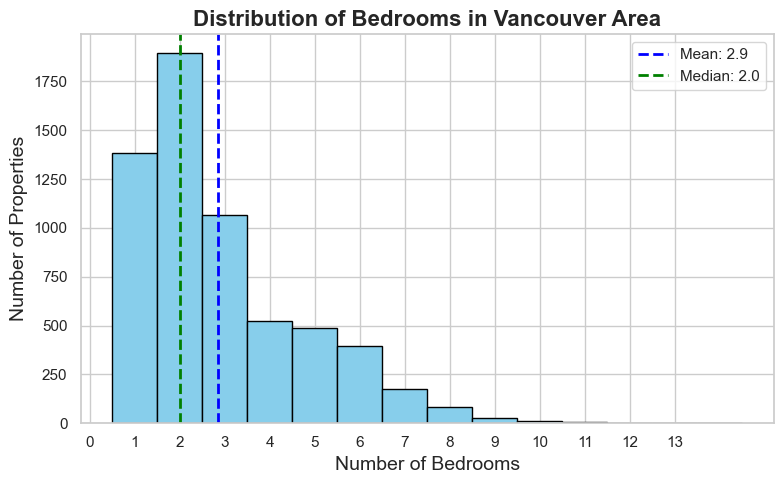

In [20]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plot histogram for number of bathrooms
bed_data = df["bedroom"].dropna()
plt.hist(bed_data, bins=range(1, int(bed_data.max()) + 2), color='skyblue', edgecolor='black', align='left')

# Titles and labels
plt.title("Distribution of Bedrooms in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Add vertical lines for mean and median
mean_bed = bed_data.mean()
median_bed = bed_data.median()
plt.axvline(mean_bed, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_bed:.1f}')
plt.axvline(median_bed, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bed:.1f}')

plt.xticks(range(0, int(bath_data.max()) + 2))
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# # Further examination of price distribution by zip code

# zip_summary = df.groupby("zip_code").agg(
#     num_properties=("price", "count"),
#     mean_price=("price", "mean"),
#     median_price=("price", "median"),
#     mean_sqft=("square_footage", "mean"),
#     median_sqft=("square_footage", "median")
# ).reset_index()

# # Optionally: format large numbers for readability
# zip_summary["mean_price"] = zip_summary["mean_price"].round(0)
# zip_summary["median_price"] = zip_summary["median_price"].round(0)
# zip_summary["mean_sqft"] = zip_summary["mean_sqft"].round(0)
# zip_summary["median_sqft"] = zip_summary["median_sqft"].round(0)

# # Display the summary
# zip_summary
